# TP DIMENSIONNEMENT OFDMA

Préparer par:
**Rami EL FEGHALI - Sory BARRY**

## 1. Modèle

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.special import gamma as gammafunct

## 2. Implémentation du modèle

### Question 1

In [ ]:
l= 0.01 #lambda, intensité du processus de Poisson en m-2
r= 320 #r est le rayon du cercle

mu= l*np.pi*r*r #la mesure mu d'intensité lambda est égale à lambda*delta, avec delta la mesure de Lebesgue, 
#vu qu'on travaille dans un domaine de R**2, la mesure de Lebesgue est donc l'aire du cercle de rayon r

N = np.random.poisson(mu)

print("Le nombre d'utilisateur est: " , N)

Le nombre d'utilisateur est:  3178


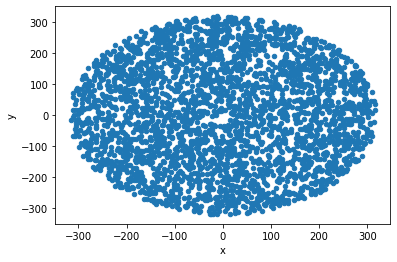

In [ ]:
dataset=np.zeros((N,2)) #Matrice N lignes deux colonnes contenant les coordonnées des stations de base
i=0
while i < N:
  tmp_x = np.random.uniform(0,1)*2*r-r
  tmp_y = np.random.uniform(0,1)*2*r-r
  if(tmp_x**2 + tmp_y**2 < r**2):
    dataset[i][0] = tmp_x
    dataset[i][1] = tmp_y
    i+=1

df = pd.DataFrame(dataset)
df.columns=["x","y"]

ax = df.plot.scatter(x='x',y='y')

### Question 2

Le nombre moyen d'utilisateurs dans la cellule n'est autre que l'esperance du Processus de Poisson mu(A)

In [ ]:
print(round(mu))

3217


### Question 3

Le processus des utilisateurs actifs à chaque instant dans la cellule est un processus de Poisson d'intensité: p\*lambda = 0.01 * 0.01 = 0.0001\
Le nombre moyen d'utilisateur est l'esperance du processus de Poisson des utilisateurs actifs


In [ ]:
p=0.01
l1= p*l
mu_ue = l1*np.pi*r*r
print("le nombre moyen d'ue actif est :", round(mu_ue))

le nombre moyen d'ue actif est : 32


### Question 4

In [ ]:
C= 162
w= 180
SNR_min= 0.1

qmax= math.ceil(C / (w*np.log2(1 + SNR_min)) )

print("Le nombre maximum de ressources\nqu'un utilisateur peut demander est: ", qmax)

Le nombre maximum de ressources
qu'un utilisateur peut demander est:  7


## 3. Probabilité d'Outage

### Question 5

La fonction, tirage_ue simule un processus de poisson et retourne le nombre des ue ainsi que leurs coordonées dans la cellule

In [ ]:
K= 1E6
gamma= 2.8

In [ ]:
def tirage_ue(mu_ue):
 
  N1 = np.random.poisson(mu_ue) # nombre d'UE actifs

  dataset_ue_actif=np.zeros((N1,2)) #Matrice N1 lignes deux colonnes contenant les coordonnées des stations de base
  i=0
  while i < N1:
    tmp_x = np.random.uniform(0,1)*2*r-r
    tmp_y = np.random.uniform(0,1)*2*r-r
    if(tmp_x**2 + tmp_y**2 < r**2):
      dataset_ue_actif[i][0] = tmp_x
      dataset_ue_actif[i][1] = tmp_y
      i+=1
  return N1,dataset_ue_actif

La fonction outages(), prends en arguments , le Smin et Smax et le pas , sur la base desquelles on va simule le nombre d'outages.\
La fonction retourne un tableau avec le nombre d'outage sur 10000 simulation pour chaque pas.

In [ ]:
def outages(S_min,S_max, pas, gamma, mu_ue):

  nb_outage = []
  iterrator=0 #definit la position entre S_min et S_max, premier pas, deuxieme...)
  for S in range(S_min, S_max+pas,pas):
    nb_outage.append(0)
    for i in range(10000):
      N1,dataset_ue_actif = tirage_ue(mu_ue) # nombre d'UE actifs

      F=0   # nombre total de ressources demandées dans la cellule
      for j in range(N1):
        r= np.sqrt(dataset_ue_actif[j][0]**2+dataset_ue_actif[j][1]**2)
        cond = K/(r**gamma)
        if(cond > SNR_min):
          q= math.ceil(C / (w*np.log2(1 + cond)) )
        else:
          q= math.ceil(C / (w*np.log2(1 + SNR_min)) )
        F+=q
      if (F >= S):
        nb_outage[iterrator]+=1
    iterrator+=1 
  return nb_outage

In [ ]:
S_min = 160
S_max = 180
pas = 1
Simu= outages(S_min,S_max,pas,gamma,mu_ue)

In [ ]:
print("Le nombre d'outage entre ", S_min, " et ", S_max , " avec un pas de ", pas , " est :\n", Simu)

print("La probabilité relative a chaque outage pour chaque pas est: ")
proba=[]
for i in range(len(Simu)):
  proba.append(Simu[i]/10000)
print(proba)

Le nombre d'outage entre  160  et  180  avec un pas de  1  est :
 [255, 218, 207, 176, 143, 152, 135, 148, 104, 97, 101, 82, 74, 78, 68, 60, 50, 50, 38, 38, 29]
La probabilité relative a chaque outage pour chaque pas est: 
[0.0255, 0.0218, 0.0207, 0.0176, 0.0143, 0.0152, 0.0135, 0.0148, 0.0104, 0.0097, 0.0101, 0.0082, 0.0074, 0.0078, 0.0068, 0.006, 0.005, 0.005, 0.0038, 0.0038, 0.0029]


### Question 6

β= qmax et α=qmax\*r\*sqrt(λ*π)

In [ ]:
beta = qmax
alpha = qmax*r*np.sqrt(l1*np.pi)
print("beta : " , beta)
print("alpha : ", alpha)

beta :  7
alpha :  39.70296626028356


### Question 7

In [ ]:

data_rk=[]
data_rk.append(0)
for k in range(1,qmax):
  rk=(K/(2**(C/(k*w))-1))**(1/gamma)
  data_rk.append(rk)
data_rk.append(r)

somme=0
for k in range(1,qmax+1):
  somme=somme+ k*(data_rk[k]**2-data_rk[k-1]**2)
E_F=l1*np.pi*somme
print(E_F)

112.07637130779693


Après application des formules du cours, le nombre moyen de ressources demandées est 112.

### Question 8

In [ ]:
def verif_inegalite(S_min, S_max,pas):
  iterator=0
  for S in range(S_min, S_max+pas,pas):
    y=S-E_F
    tmp1=(y/beta)+((alpha**2)/(beta**2))
    tmp2= np.log(1+((beta*y)/(alpha**2)))
    tmp3= (y/beta)

    tmp = np.exp(-(tmp1*tmp2)+tmp3)

    if (proba[iterator] >tmp): #proba c'est le vecteur de probabilité d'outage de la question 5
      print("l’inégalité de concentration n'est pas vérifiée")
    iterator+=1
  return print("l’inégalité de concentration est vérifiée")

In [ ]:
verif_inegalite(S_min, S_max,pas)

l’inégalité de concentration est vérifiée


### Question 9

In [ ]:
#question, est ce qu on doit prendre smin et smax ou commencer par 0 et incrementer
S=round(E_F)
tmp=1
while tmp > 0.01:
    S+=1
    y=S-E_F
    tmp1=(y/beta)+((alpha**2)/(beta**2))
    tmp2= np.log(1+((beta*y)/(alpha**2)))
    tmp3= (y/beta)
    tmp = np.exp(-(tmp1*tmp2)+tmp3)
        
print("Le nombre de ressources nécessaires pour avoir le majorant de la probabilité\nd’outage PS inférieur à 0.01 est : " , S)

Le nombre de ressources nécessaires pour avoir le majorant de la probabilité
d’outage PS inférieur à 0.01 est :  243


### Question 10

In [ ]:
tmp=0
for i in range(10):
  tmp= tmp+ outages(S,S,pas,gamma,mu_ue)[0]

print("la probabilité Ps vaut:" , tmp/100000)

la probabilité Ps vaut: 0.0


### Question 11

In [ ]:
#pour les variation de lambda
l2= [0.9*l1,1.1*l1,0.8*l1,1.2*l1]

mu_ue2=[]
Simulation1= []
for i in range(len(l2)):
  mu_ue2.append(l2[i]*np.pi*r*r)
  Simulation1.append(outages(S,S,1,gamma,mu_ue2[i])[0])

print("pour lambda: ",)
for i in Simulation1:
  print(i/10000," - " , end = '')

#pour les variations de gamma
gamma2= [0.98*gamma,1.02*gamma,0.95*gamma,1.05*gamma]

Simulation2= []
for g in gamma2:
  Simulation2.append(outages(S,S,1,g,mu_ue)[0])

print("\npour gamma: ",)
for i in Simulation2:
  print(i/10000," - " , end = '')

pour lambda: 
0.0  - 0.0  - 0.0  - 0.0  - 
pour gamma: 
0.0  - 0.0004  - 0.0  - 0.0049  - 

### Question 12

Le dimensionnement S=243 obtenu dans la question 9 est bon car les probabilités obtenues avec des variations de lambda et gamma restent inférieures au seuil choisi (0.01).

## 4. Introduction du fading

### Question 13

In [ ]:
def outages_with_fading(S_min,S_max, pas, gamma, mu_ue):

  nb_outage = []
  iterrator=0 #definit la position entre S_min et S_max, premier pas, deuxieme...)
  for S in range(S_min, S_max+pas,pas):
    nb_outage.append(0)
    for i in range(10000):
      N1,dataset_ue_actif = tirage_ue(mu_ue) # nombre d'UE actifs
      F=0   # nombre total de ressources demandées dans la cellule
      for j in range(N1):
        mx=np.random.exponential(1) #AJOUT
        r= np.sqrt(dataset_ue_actif[j][0]**2+dataset_ue_actif[j][1]**2)
        cond = (K*mx)/(r**gamma)  #CHANGEMENT
        if(cond > SNR_min):
          q= math.ceil(C / (w*np.log2(1 + cond)))
        else:
          q= math.ceil(C / (w*np.log2(1 + SNR_min)) )
        F+=q
      if (F >= S):
        nb_outage[iterrator]+=1
    iterrator+=1 
  return nb_outage

In [ ]:
S_min = 195
S_max = 215
pas = 1
Simu= outages_with_fading(S_min,S_max,pas,gamma,mu_ue)

In [ ]:
print("Le nombre d'outage entre ", S_min, " et ", S_max , " avec un pas de ", pas , " est :\n", Simu)

print("La probabilité relative a chaque outage pour chaque pas est: ")
proba=[]
for i in range(len(Simu)):
  proba.append(Simu[i]/10000)
print(proba)

Le nombre d'outage entre  195  et  215  avec un pas de  1  est :
 [191, 158, 158, 141, 132, 115, 116, 117, 100, 95, 67, 86, 78, 70, 63, 62, 59, 56, 37, 42, 24]
La probabilité relative a chaque outage pour chaque pas est: 
[0.0191, 0.0158, 0.0158, 0.0141, 0.0132, 0.0115, 0.0116, 0.0117, 0.01, 0.0095, 0.0067, 0.0086, 0.0078, 0.007, 0.0063, 0.0062, 0.0059, 0.0056, 0.0037, 0.0042, 0.0024]


### Question 14

In [ ]:
E_F_m= E_F*gammafunct((2/gamma)+1)

print("Après application des formules du cours,\nle nombre moyen de ressources demandées est :", E_F_m)

Après application des formules du cours,
le nombre moyen de ressources demandées est : 102.14902063188035


### Question 15

In [ ]:
S_fading=round(E_F_m)
tmp=1
while tmp > 0.01:
    S_fading+=1
    y=S_fading-E_F_m
    tmp1=(y/beta)+((alpha**2)/(beta**2))
    tmp2= np.log(1+((beta*y)/(alpha**2)))
    tmp3= (y/beta)
    tmp = np.exp(-(tmp1*tmp2)+tmp3)
        
print("Le nombre de ressources nécessaires pour avoir le majorant de la probabilité\nd’outage PS inférieur à 0.01 est : " , S_fading)

Le nombre de ressources nécessaires pour avoir le majorant de la probabilité
d’outage PS inférieur à 0.01 est :  233


### Question 16

In [ ]:
tmp=0
for i in range(10):
  tmp= tmp+ outages_with_fading(S_fading,S_fading,pas,gamma,mu_ue)[0]

print("la probabilité d'outage vaut:", tmp/100000)

la probabilité d'outage vaut: 0.00057


### Question 17

In [ ]:
#pour les variation de lambda
l2= [0.9*l1,1.1*l1,0.8*l1,1.2*l1]

mu_ue_fading=[]
Simulation1_fading= []
for i in range(len(l2)):
  mu_ue_fading.append(l2[i]*np.pi*r*r)
  Simulation1_fading.append(outages_with_fading(S_fading,S_fading,1,gamma,mu_ue_fading[i])[0])

print("pour lambda: ",)
for i in Simulation1_fading:
  print(i/10000," - " , end = '')

#pour les variations de gamma
gamma_fading= [0.98*gamma,1.02*gamma,0.95*gamma,1.05*gamma]

Simulation2_fading= []
for g in gamma_fading:
  Simulation2_fading.append(outages_with_fading(S_fading,S_fading,1,g,mu_ue)[0])

print("\npour gamma: ",)
for i in Simulation2_fading:
  print(i/10000," - " , end = '')

pour lambda: 
0.0002  - 0.0036  - 0.0  - 0.013  - 
pour gamma: 
0.0  - 0.0039  - 0.0  - 0.0255  - 

### Question 18

Le dimensionnement S_fading=233 obtenu dans la question 15 n'est pas bon car les probabilités obtenues avec des variations de lambda et gamma (+20% et +5% respectivement) sont supérieures au seuil choisi (0.01).